# Algoritmo di Deutsch su Qubit non adiacenti
 Consideriamo il più semplice circuito per analizzare il funzionamento sulle varie QPU utilizzando l'algoritmo di Deutsch (2 Hadamard 1 Cnot 2 Hadamard

Osserviamo prima come viene compilato il circuito e proviamo successivamente ad usare Qubit lontani

In [9]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [1]:
%load_ext autoreload

# general imports
import numpy as np
import math
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice
from braket.device_schema.device_action_properties import DeviceActionType
import numpy as np

from utils import Plotter, DeviceUtils,BraketTaskScanner, DeviceScanner


SyntaxError: invalid syntax (utils.py, line 253)

### Deutsch standard, utilizzando qubit adiacenti scelti dai compilatori

In [3]:
#Inizializziamo inizialmente il qubit q_1 nello stato |1>
deutsch_standard = Circuit().x([1]).h(range(2)).cnot(control=0,target=1).h(range(2))
print(deutsch_standard)
print ('circ depth is' ,deutsch_standard.depth)
# get qubit number
#qubit_count = deutsch.qubit_count


T  : |0|1|2|3|
              
q0 : -H---C-H-
          |   
q1 : -X-H-X-H-

T  : |0|1|2|3|
circ depth is 4


### Deutsch non adiacente, utilizzando qubit non adiacenti ma scelti comuqnue dai compilatori

In [4]:
#Inizializziamo inizialmente il qubit q_1 nello stato |1>
q_1 = 1
q_5 = 5
deutsch_non_adj = Circuit().x(q_5).h([q_1,q_5]).cnot(control=q_1,target=q_5).h([q_1,q_5])
print(deutsch_non_adj)

T  : |0|1|2|3|
              
q1 : -H---C-H-
          |   
q5 : -X-H-X-H-

T  : |0|1|2|3|


# 1. RIGETTI

### parte 1- Circuito standard

In [22]:
#Rigetti AspenM2
device = DeviceUtils.get_device("rigetti")

#############################
Device name:  Aspen-M-2
Device type:  AwsDeviceType.QPU
Device arn:  arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2
Device provider: Rigetti
Device status: ONLINE
Device availability:  False
Device region:  us-west-1


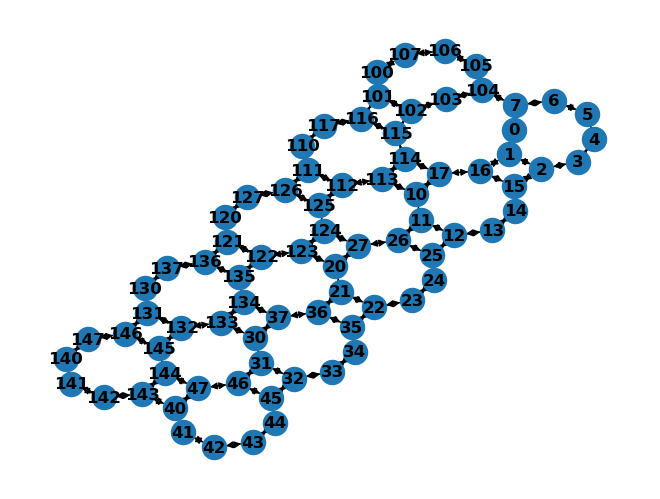

In [23]:
DeviceScanner(device=device).list_properties()

In [9]:
deustch_std_task = device.run(deutsch_standard, shots = 100)
deustch_std_task_id = deustch_std_task.id

In [5]:
deustch_std_task_id = 'arn:aws:braket:us-west-1:669156107387:quantum-task/351406f2-1298-4c38-afc8-6dd9e7f0c76b'

In [6]:
scanner_aspen = BraketTaskScanner(deustch_std_task_id)


COMPLETED
True
ONLINE
0.3350000000
Counter({'11': 79, '10': 9, '01': 8, '00': 4})


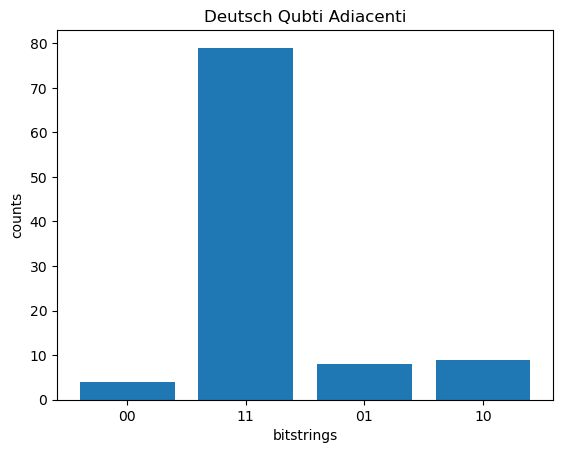

In [14]:
print( scanner_aspen.get_status())
print( scanner_aspen.results_available())
print( scanner_aspen.get_device_status())

#print(scanner.get_circuit())
#print(scanner_aspen.get_circuit())
print(scanner_aspen.cost_extimate())

Plotter.plot_binary_results(scanner_aspen.get_results(),title = 'Deutsch Qubti Adiacenti' ,debug=True)

In [19]:
print(scanner_aspen.get_compiled_circuit())

DECLARE ro BIT[2]
PRAGMA INITIAL_REWIRING "PARTIAL"
RESET
RZ(pi/2) 10
RX(pi/2) 10
RZ(pi/2) 10
RZ(pi/2) 17
RX(pi/2) 17
RZ(pi) 17
XY(pi) 17 10
RZ(-3*pi/2) 17
RX(pi/2) 17
RZ(3*pi/2) 17
XY(pi) 17 10
RZ(pi/2) 10
RX(pi/2) 10
RZ(pi/2) 17
RX(pi/2) 17
RZ(pi/2) 17
MEASURE 17 ro[1]
MEASURE 10 ro[0]



### parte 2 - Circuito con qubit non adiacenti

In [24]:
#Rigetti AspenM2
device = DeviceUtils.get_device("rigetti")

In [25]:
deutsch_non_adj_task = device.run(deutsch_non_adj, shots = 100)
deutsch_non_adj_task_id = deutsch_non_adj_task.id

In [28]:
deutsch_non_adj_task_id = 'arn:aws:braket:us-west-1:669156107387:quantum-task/11935470-bbb4-44fc-b056-cf9c522fc8d8'

In [29]:
scanner_aspen = BraketTaskScanner(deutsch_non_adj_task_id)
print( scanner_aspen.get_status())


COMPLETED


COMPLETED
True
ONLINE
0.3350000000
Counter({'11': 79, '10': 9, '01': 8, '00': 4})


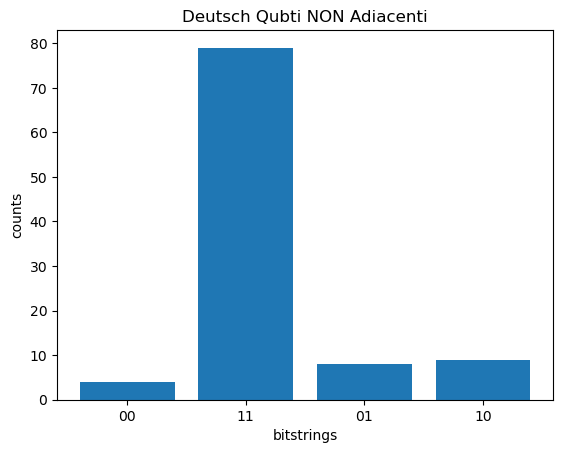

In [30]:
print( scanner_aspen.get_status())
print( scanner_aspen.results_available())
print( scanner_aspen.get_device_status())

#print(scanner.get_circuit())
#print(scanner_aspen.get_circuit())
print(scanner_aspen.cost_extimate())

Plotter.plot_binary_results(scanner_aspen.get_results(),title = 'Deutsch Qubti NON Adiacenti', debug=True)

In [33]:
print(scanner_aspen.get_circuit())
print(scanner_aspen.get_compiled_circuit())

OPENQASM 3.0;
bit[2] b;
qubit[6] q;
x q[5];
h q[1];
h q[5];
cnot q[1], q[5];
h q[1];
h q[5];
b[0] = measure q[5];
b[1] = measure q[1];
DECLARE ro BIT[2]
PRAGMA INITIAL_REWIRING "PARTIAL"
RESET
RZ(pi/2) 10
RX(pi/2) 10
RZ(pi/2) 10
RZ(pi/2) 17
RX(pi/2) 17
RZ(pi) 17
XY(pi) 17 10
RZ(-3*pi/2) 17
RX(pi/2) 17
RZ(3*pi/2) 17
XY(pi) 17 10
RZ(pi/2) 10
RX(pi/2) 10
RZ(pi/2) 17
RX(pi/2) 17
RZ(pi/2) 17
MEASURE 17 ro[1]
MEASURE 10 ro[0]



### parte 3 - Circuito con qubit scelti dall'utente


# PROBLEMA: si possono eseguire porte a più qubit SOLO su qubit adiacenti

# 2.LUCY (oqc)

### parte 1- Circuito standard

In [36]:
device = DeviceUtils.get_device("oqc")

#############################
Device name:  Lucy
Device type:  AwsDeviceType.QPU
Device arn:  arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy
Device provider: Oxford
Device status: ONLINE
Device availability:  False
Device region:  eu-west-2


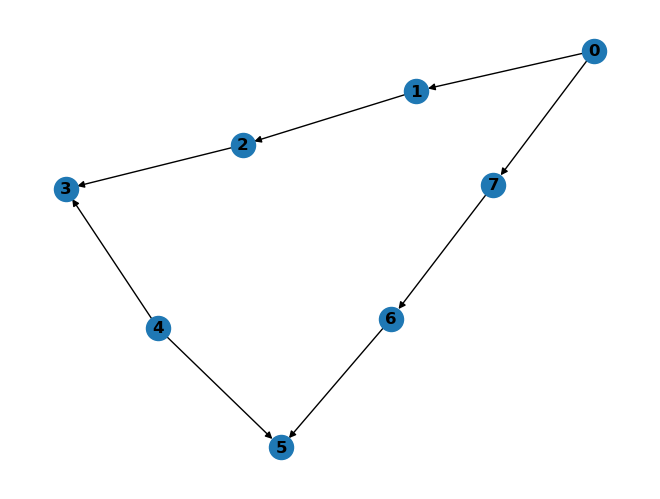

In [37]:
DeviceScanner(device=device).list_properties()

In [34]:
lucy_task_id = "arn:aws:braket:eu-west-2:058017682654:quantum-task/a2b43a8e-3e5e-4776-bfc4-39ae0cb9a986" 

In [35]:
scanner_lucy = BraketTaskScanner(lucy_task_id)
print(scanner_lucy.get_status())


AccessDeniedException: An error occurred (AccessDeniedException) when calling the GetQuantumTask operation: User: arn:aws:iam::669156107387:user/Rui_Libero is not authorized to access this resource

In [ ]:
print( scanner_aspen.get_status())
print( scanner_aspen.results_available())
print( scanner_aspen.get_device_status())

#print(scanner.get_circuit())
#print(scanner_aspen.get_circuit())
print(scanner_aspen.cost_extimate())

Plotter.plot_binary_results(scanner_aspen.get_results(), debug=True)

In [133]:

#lucy example Deutsch task

lucy_task_id = "arn:aws:braket:eu-west-2:058017682654:quantum-task/a2b43a8e-3e5e-4776-bfc4-39ae0cb9a986" 
task = AwsQuantumTask(arn = lucy_task_id)

list_task_result_metadata(task, task_type = "OQC")

#####################
OpenQASM input program
OPENQASM 3.0;
bit[2] b;
qubit[2] q;
x q[1];
h q[0];
h q[1];
cnot q[0], q[1];
h q[0];
h q[1];
b[0] = measure q[1];
b[1] = measure q[0];
Circuit inputs: None
#####################
OpenQASM compiled program
OPENQASM 2.0;
include "qelib1.inc";

qreg node[6];
creg b[2];
u3(1.5*pi,-0.5*pi,4.0*pi) node[4];
u3(1.5*pi,0.0*pi,4.0*pi) node[5];
cx node[4],node[5];
u3(0.5*pi,0.0*pi,0.5*pi) node[4];
u3(0.5*pi,0.0*pi,1.0*pi) node[5];
measure node[5] -> b[0];
measure node[4] -> b[1];



In [28]:
circ = QuantumCircuit().from_qasm_str("""OPENQASM 2.0;
include "qelib1.inc";

qreg node[6];
creg b[2];
u3(1.5*pi,-0.5*pi,4.0*pi) node[4];
u3(1.5*pi,0.0*pi,4.0*pi) node[5];
cx node[4],node[5];
u3(0.5*pi,0.0*pi,0.5*pi) node[4];
u3(0.5*pi,0.0*pi,1.0*pi) node[5];
measure node[5] -> b[0];
measure node[4] -> b[1];""")

circ.draw()

node_0: ────────────────────────────────────────────────
                                                        
node_1: ────────────────────────────────────────────────
                                                        
node_2: ────────────────────────────────────────────────
                                                        
node_3: ────────────────────────────────────────────────
        ┌──────────────────┐     ┌───────────────┐   ┌─┐
node_4: ┤ U3(3π/2,-π/2,4π) ├──■──┤ U3(π/2,0,π/2) ├───┤M├
        └┬───────────────┬─┘┌─┴─┐└┬─────────────┬┘┌─┐└╥┘
node_5: ─┤ U3(3π/2,0,4π) ├──┤ X ├─┤ U3(π/2,0,π) ├─┤M├─╫─
         └───────────────┘  └───┘ └─────────────┘ └╥┘ ║ 
   b_0: ═══════════════════════════════════════════╩══╬═
                                                      ║ 
   b_1: ══════════════════════════════════════════════╩═

Counter({'11': 74, '10': 16, '00': 5, '01': 5})


Text(0, 0.5, 'counts')

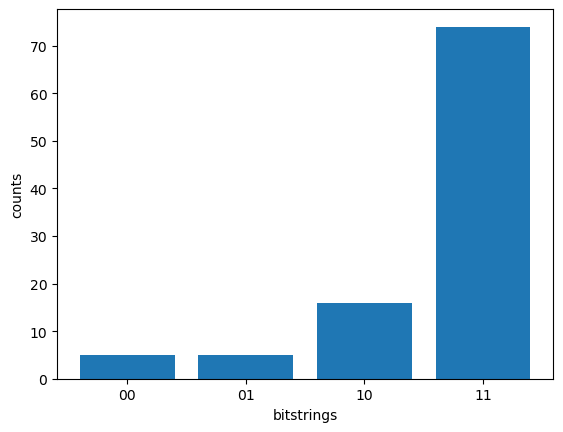

In [17]:
result = q_task.result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

### parte 2 - Circuito con qubit non adiacenti

In [39]:
#OQC LUCY
device = DeviceUtils.get_device("oqc")

In [40]:
deutsch_non_adj_task_oqc = device.run(deutsch_non_adj, shots = 100)
deutsch_non_adj_task_oqc__id = deutsch_non_adj_task_oqc.id

In [38]:
deutsch_non_adj_task_oqc__id = 'arn:aws:braket:eu-west-2:669156107387:quantum-task/f129cd7f-4f51-45c0-9ec1-3c842e9aa64b'

In [39]:
scanner_lucy = BraketTaskScanner(deutsch_non_adj_task_oqc__id)
print( scanner_lucy.get_status())


FAILED


In [40]:
print( scanner_lucy.get_status())
print( scanner_lucy.get_device_status())
print( scanner_lucy.results_available())
print(scanner_lucy.cost_extimate())


FAILED
ONLINE
False
0


In [ ]:

Plotter.plot_binary_results(scanner_lucy.get_results(), debug=True)

# 3. IONQ

Per Ion Q la questione è diversa in quanto tutti i Qubit sono collegati tra noi, proviamo a capire se è possibile operare una selezione manuale dal momento che la guida "Aws developer guide" e la pagina di Github di Amazon Braket sono tra loro discordi

### Deutsch non adiacente, utilizzando qubit non adiacenti ma scelti comuqnue dai compilatori

In [105]:
#Inizializziamo inizialmente il qubit q_1 nello stato |1>
q_1 = 1
q_5 = 5
empty_qubits = [x for x in range(10)]
empty_qubits.remove(q_1)
empty_qubits.remove(q_5)

deutsch_ionq_rewired = Circuit().x(empty_qubits).x(q_5).h([q_1,q_5]).cnot(control=q_1,target=q_5).h([q_1,q_5])

print(deutsch_ionq_rewired)

T  : |0|1|2|3|
              
q0 : -X-------
              
q1 : -H---C-H-
          |   
q2 : -X---|---
          |   
q3 : -X---|---
          |   
q4 : -X---|---
          |   
q5 : -X-H-X-H-
              
q6 : -X-------
              
q7 : -X-------
              
q8 : -X-------
              
q9 : -X-------

T  : |0|1|2|3|


### parte 1- Circuito standard

In [106]:
device = DeviceUtils.get_device("ionq")

#############################
Device name:  IonQ Device
Device type:  AwsDeviceType.QPU
Device arn:  arn:aws:braket:::device/qpu/ionq/ionQdevice
Device provider: IonQ
Device status: ONLINE
Device availability:  False
Device region:  


['x',
 'y',
 'z',
 'rx',
 'ry',
 'rz',
 'h',
 'cnot',
 's',
 'si',
 't',
 'ti',
 'v',
 'vi',
 'xx',
 'yy',
 'zz',
 'swap']

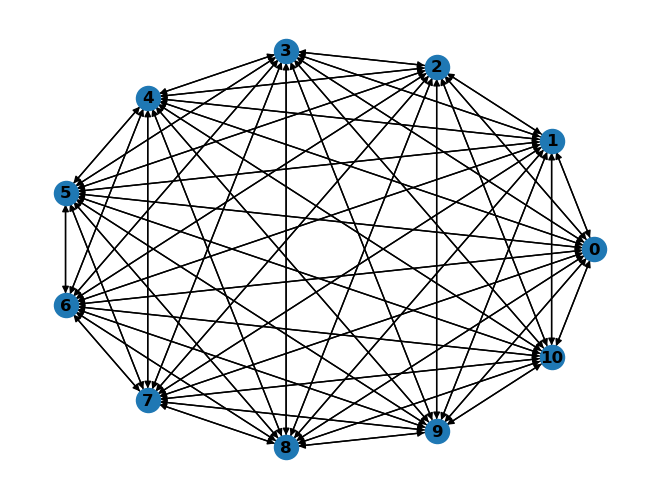

In [107]:
DeviceScanner(device=device).list_properties()
DeviceScanner(device=device).get_supported_gates()

In [109]:
deutsch_ionq_rewired = device.run(deutsch_ionq_rewired, shots = 100, disable_qubit_rewiring=True)
deutsch_ionq_rewired_id = deutsch_ionq_rewired.id

In [4]:
deutsch_ionq_rewired_id='arn:aws:braket:us-east-1:058017682654:quantum-task/3e8aae0d-ef7a-4f4a-8122-9f3ceb6a7880'

In [5]:
scanner_ion_q = BraketTaskScanner(deutsch_ionq_rewired_id)
print( scanner_ion_q.get_status())


COMPLETED


In [6]:
print( scanner_ion_q.get_status())
print( scanner_ion_q.get_device_status())
print( scanner_ion_q.results_available())
print(scanner_ion_q.cost_extimate())


COMPLETED
ONLINE
True
1.3000000000


Counter({'1111111111': 87, '1111110111': 3, '1101111111': 3, '1011111111': 3, '1111111110': 1, '1111101101': 1, '1111011111': 1, '1110111111': 1})


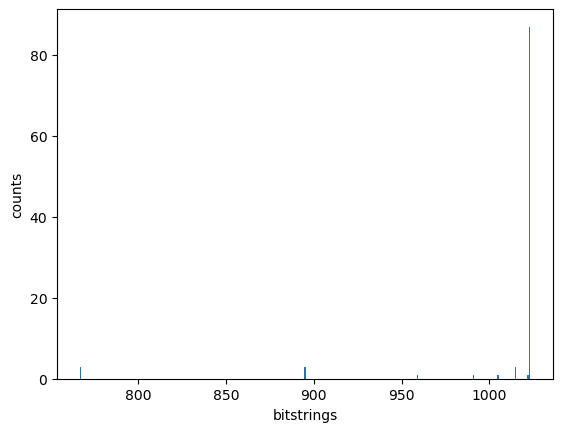

In [10]:

Plotter.plot_binary_results(scanner_ion_q.get_results(),decimal = True, debug=True)

In [8]:
print(scanner_ion_q.get_circuit())
print(scanner_ion_q.get_compiled_circuit())

OPENQASM 3.0;
bit[10] b;
x $0;
x $2;
x $3;
x $4;
x $6;
x $7;
x $8;
x $9;
x $5;
h $1;
h $5;
cnot $1, $5;
h $1;
h $5;
b[0] = measure $0;
b[1] = measure $2;
b[2] = measure $3;
b[3] = measure $4;
b[4] = measure $6;
b[5] = measure $7;
b[6] = measure $8;
b[7] = measure $9;
b[8] = measure $5;
b[9] = measure $1;
IONQ Task: No compiled source

